<a href="https://colab.research.google.com/github/nandinijirobe/Allstate_AIStudio_Project/blob/main/Allstate_AI_Studio_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Packages**

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
import pandas as pd
import numpy as np
import os
from google.colab import drive

# **Part 1: Load the Data Set**
Note: To be able to access the Fire Data in this Colab, you must add the shared drive with the data files as a shortcut to your personal drive

In [20]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [21]:
df1 = pd.DataFrame()
df2 = pd.DataFrame()
df3 = pd.DataFrame()
df4 = pd.DataFrame()
df5 = pd.DataFrame()

for year in range(1992, 1997):
  file_path = f'/content/drive/My Drive/Allstate (VIR) - Wildfire Incidence and Property Insurance: A Data-Driven Analysis (Team B)/AllstateDataFiles/fires_'+str(year)+ '.csv'
  new_data = pd.read_csv(file_path)
  df1 = pd.concat([df1, new_data], axis=0)

for year in range(1998, 2003):
  file_path = f'/content/drive/My Drive/Allstate (VIR) - Wildfire Incidence and Property Insurance: A Data-Driven Analysis (Team B)/AllstateDataFiles/fires_'+str(year)+ '.csv'
  new_data = pd.read_csv(file_path)
  df2 = pd.concat([df2, new_data], axis=0)

for year in range(2004, 2009):
  file_path = f'/content/drive/My Drive/Allstate (VIR) - Wildfire Incidence and Property Insurance: A Data-Driven Analysis (Team B)/AllstateDataFiles/fires_'+str(year)+ '.csv'
  new_data = pd.read_csv(file_path)
  df3 = pd.concat([df3, new_data], axis=0)

for year in range(2010, 2015):
  file_path = f'/content/drive/My Drive/Allstate (VIR) - Wildfire Incidence and Property Insurance: A Data-Driven Analysis (Team B)/AllstateDataFiles/fires_'+str(year)+ '.csv'
  new_data = pd.read_csv(file_path)
  df4 = pd.concat([df4, new_data], axis=0)

df1.reset_index(inplace=True)
df2.reset_index(inplace=True)
df3.reset_index(inplace=True)
df4.reset_index(inplace=True)

<ipython-input-21-c64fa39ac8c4>:9: DtypeWarning: Columns (11,29) have mixed types. Specify dtype option on import or set low_memory=False.
  new_data = pd.read_csv(file_path)
<ipython-input-21-c64fa39ac8c4>:9: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  new_data = pd.read_csv(file_path)
<ipython-input-21-c64fa39ac8c4>:9: DtypeWarning: Columns (11,29) have mixed types. Specify dtype option on import or set low_memory=False.
  new_data = pd.read_csv(file_path)
<ipython-input-21-c64fa39ac8c4>:9: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  new_data = pd.read_csv(file_path)
<ipython-input-21-c64fa39ac8c4>:9: DtypeWarning: Columns (11,29) have mixed types. Specify dtype option on import or set low_memory=False.
  new_data = pd.read_csv(file_path)
<ipython-input-21-c64fa39ac8c4>:14: DtypeWarning: Columns (11,19,29,31) have mixed types. Specify dtype option on import or set low

# **Part 1.1: Inspecting the data**

In [22]:
# What is the size of my dataset?
print(df1.shape)
# What are my features and their datatypes?
print(df1.dtypes)
# View one of the dataframes
df1.head(5)

(352965, 50)
index                           int64
Unnamed: 0                      int64
OBJECTID                        int64
FOD_ID                          int64
FPA_ID                         object
SOURCE_SYSTEM_TYPE             object
SOURCE_SYSTEM                  object
NWCG_REPORTING_AGENCY          object
NWCG_REPORTING_UNIT_ID         object
NWCG_REPORTING_UNIT_NAME       object
SOURCE_REPORTING_UNIT          object
SOURCE_REPORTING_UNIT_NAME     object
LOCAL_INCIDENT_ID              object
FIRE_NAME                      object
FIRE_YEAR                       int64
DISCOVERY_DATE                 object
DISCOVERY_DOY                   int64
DISCOVERY_TIME                float64
STAT_CAUSE_CODE               float64
STAT_CAUSE_DESCR               object
CONT_DATE                      object
CONT_DOY                      float64
CONT_TIME                     float64
FIRE_SIZE                     float64
FIRE_SIZE_CLASS                object
LATITUDE                      float64

,index,Unnamed: 0,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,...,agency_Country,agency_State,agency_Code,agency_Name,bbox_xmin,bbox_xmax,bbox_ymin,bbox_ymax,fips_state_cd,county_fips
0,0,41875,41876,42087,FS-255009,FED,FS-FIRESTAT,FS,USMTBDF,Beaverhead/Deerlodge National Forest,...,US,MT,BDF,Beaverhead/Deerlodge National Forest,-113.078346,-113.078331,45.359993,45.360001,30,0
1,1,41876,41877,42088,FS-255013,FED,FS-FIRESTAT,FS,USMTBDF,Beaverhead/Deerlodge National Forest,...,US,MT,BDF,Beaverhead/Deerlodge National Forest,-112.683334,-112.683319,44.539993,44.540001,30,0
2,2,41877,41878,42089,FS-255017,FED,FS-FIRESTAT,FS,USMTBDF,Beaverhead/Deerlodge National Forest,...,US,MT,BDF,Beaverhead/Deerlodge National Forest,-112.983345,-112.983330,44.516666,44.516670,30,0
3,3,41878,41879,42090,FS-255018,FED,FS-FIRESTAT,FS,USMTBDF,Beaverhead/Deerlodge National Forest,...,US,MT,BDF,Beaverhead/Deerlodge National Forest,-112.730003,-112.729988,44.689999,44.690006,30,0
4,4,41879,41880,42091,FS-255024,FED,FS-FIRESTAT,FS,USMTBDF,Beaverhead/Deerlodge National Forest,...,US,MT,BDF,Beaverhead/Deerlodge National Forest,-112.820015,-112.820000,45.763332,45.763340,30,0


In [23]:
# Inspecting columns LATITUDE, LONGITUDE, STATE, COUNTY, FIPS_CODE, FIPS_NAME, bbox_xmin,bbox_xmax, bbox_ymin, bbox_ymax, county_fips
# Latitude from 19.50139 to 64.85694 and longitude from -161.75583 to -68.01197 in the USA
col_list1 = ['LATITUDE', 'LONGITUDE', 'STATE', 'COUNTY', 'FIPS_CODE', 'FIPS_NAME', 'bbox_xmin','bbox_xmax', 'bbox_ymin', 'bbox_ymax', 'county_fips']
df_summ1 = df1[col_list1].describe(include='all')
df_summ1
# Columns with county_fips = 0 will be removed
# county_fips info: https://transition.fcc.gov/oet/info/maps/census/fips/fips.txt
# (678608, 37)


,LATITUDE,LONGITUDE,STATE,COUNTY,FIPS_CODE,FIPS_NAME,bbox_xmin,bbox_xmax,bbox_ymin,bbox_ymax,county_fips
count,352965.000000,352965.000000,352965,186196,186196.000000,186196,352965.000000,352965.000000,352965.000000,352965.000000,352965.000000
unique,NaN,NaN,52,1098,NaN,851,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,CA,McCurtain,NaN,Cherokee,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,44311,1893,NaN,2186,NaN,NaN,NaN,NaN,NaN
mean,37.018148,-97.411178,NaN,NaN,89.763701,NaN,-97.411185,-97.411171,37.018145,37.018150,14585.127823
std,5.801915,16.626824,NaN,NaN,84.367257,NaN,16.626825,16.626823,5.801914,5.801915,18190.931858
min,17.983333,-166.869400,NaN,NaN,1.000000,NaN,-166.869400,-166.869385,17.983332,17.983334,0.000000
25%,33.143700,-113.076910,NaN,NaN,29.000000,NaN,-113.076912,-113.076897,33.143700,33.143703,0.000000
50%,35.198333,-92.130828,NaN,NaN,69.000000,NaN,-92.130829,-92.130821,35.198330,35.198334,1121.000000
75%,40.433300,-82.560000,NaN,NaN,119.000000,NaN,-82.560013,-82.559998,40.433296,40.433300,28073.000000


# **Part 2: Data Understanding & Data Preparation**
Resources: Unit 2 of Machine Learning Foundations

**In this section we are going to the following:**
1.   Perform exploratory data analysis (EDA) to understand our data, identify key variables, and assess data quality.
2.   Clean and preprocess your data, handle missing values and outliers, and transform our data into a suitable format for modeling.

**Tasks for this month:**
1. Define the problem: What problem is the model solving? What is the label that is being predicted?
2. Remove columns we know for sure will not help the machine learning model
3. Checking for missing data and fix it
4. Feature engineering/transformation?
4. Data Visualization: see which feature correlate with the label the most, remove outliers, look for skews, observe distribution
3. Data Cleaning: Clean datasets appropriately depending on above results

**Notes about expectations and datasets:**
*  Goal: Understand the factors influencing the frequency and severity of wildfires and how these factors pose as potential risks for the property insurance  industry.
*  We would like to know where we should start offering and stop offering home insurance.
*  There is over a million examples in the fire dataset. It contains info about which counties and states wildfires have occured, the severity and the cause.
*  We have been given county_level_population dataset which shares a common column with fires datasets: county_fips.

**Things we can predict using machine learning:**
*  We can predict the *cause* of the wild fire based on the region, month, date and time.
*  We can predict the *severity* of wild fire based on cause, region, month, date and time. We can use this information with the county_level_population dataset to understand how Allstate homes will affected.

**Questions**
1.   What does the allstate_policies and allstate_pif_fraction mean?
2.   Are any class imbalance issues in this dataset? (chapter 2.1)












In [24]:
# Dropping unnecessary columns
drop_list = [
    "Unnamed: 0","OBJECTID", "FPA_ID", "SOURCE_SYSTEM_TYPE", "SOURCE_SYSTEM",
    "NWCG_REPORTING_AGENCY", "NWCG_REPORTING_UNIT_ID", "NWCG_REPORTING_UNIT_NAME", "SOURCE_REPORTING_UNIT",
    "SOURCE_REPORTING_UNIT_NAME", "LOCAL_INCIDENT_ID", "FIRE_NAME", "OWNER_CODE", "OWNER_DESCR", "fips_state_cd",
    "agency_UnitId", "agency_GeographicArea", "agency_Gacc", "agency_WildlandRole", "agency_UnitType",
    "agency_Department", "agency_Agency", "agency_Country", "agency_State", "agency_Code", "agency_Name", "STAT_CAUSE_DESCR"
]

def drop_unnecessary_columns(df):
    df.drop(drop_list, axis=1,  inplace = True)
    return df

In [25]:
def round_col_values(df, col_name, num_dec):
  df = df.round({col_name: num_dec})
  return df

def remove_null_county_fips(df):
  df = df[df['county_fips'] != 0]
  return df

# TODO: Add other different cleaning functions here
def encode_fire_cause(df):
  fire_cause_one_hot = pd.get_dummies(df['STAT_CAUSE_CODE'])
  fire_cause_one_hot.rename(columns={1: "Cause 1", 2: "Cause 2", 3: "Cause 3", 4: "Cause 4", 5: "Cause 5", 6: "Cause 6",
                                     7: "Cause 7", 8: "Cause 8", 9: "Cause 9", 10: "Cause 10", 11: "Cause 11", 12: "Cause 12", 13: "Cause 13"}, inplace=True)
  df = df.join(fire_cause_one_hot)
  return df

#EDITING
def encode_fire_size_class(df):
  fire_cause_one_hot = pd.get_dummies(df['STAT_CAUSE_CODE'])
  # fire_cause_one_hot.rename(columns={1: "Cause 1", 2: "Cause 2", 3: "Cause 3", 4: "Cause 4", 5: "Cause 5", 6: "Cause 6",
  #                                    7: "Cause 7", 8: "Cause 8", 9: "Cause 9", 10: "Cause 10", 11: "Cause 11", 12: "Cause 12", 13: "Cause 13"}, inplace=True)
  fire_cause_one_hot.head()
  df = df.join(fire_cause_one_hot)
  return df

def contained_same_day(df):
  df['contained_same_day'] = np.where(df['DISCOVERY_DATE'] == df['CONT_DATE'], True, False)
  return df

def fire_contained_date(df):
  #df['CONT_DATE'] = pd.to_datetime(df['CONT_DATE'], errors='coerce')
  df['Contained Month'] = df['CONT_DATE'].str[5:7]
  df['Contained Day'] = df['CONT_DATE'].str[8:]
  return df

def fire_discovery_date(df):
  df['Discovery Month'] = df['DISCOVERY_DATE'].str[5:7]
  df['Discovery Day'] = df['DISCOVERY_DATE'].str[8:]
  return df

def fire_discovery_doy(df):
  df['Day of the Year'] = df['DISCOVERY_DOY']
  return df

def categorize_time(time):
    if 600 <= time < 1200:
        return "Morning"
    elif 1200 <= time < 1800:
        return "Afternoon"
    elif 1800 <= time < 2400:
        return "Evening"
    else:
        return "Night"

def fire_discovery_time(df):
  df['Discovery Time'] = df['DISCOVERY_TIME'].apply(categorize_time)
  return df

def fire_year(df):
  df['Fire_Year'] = df['FIRE_YEAR']
  return df

def fod_id(df):
  df['FOD_ID'] = df['FOD_ID']
  return df

In [26]:
def clean_cont_time(df):
  df['Contained Time'] = pd.to_datetime(df['CONT_TIME'], format='%H%M', errors='coerce').dt.strftime('%H:%M:%S')
  df['Contained Time'].fillna('00:00:00', inplace=True)
  return df

def clean_fire_size(df):
  df['FIRE_SIZE'] = pd.to_numeric(df['FIRE_SIZE'], errors='coerce')
  df['FIRE_SIZE'].fillna(np.nan, inplace=True)
  return df

def clean_fire_size_class(df):
  size_class_mapping = {
        'A': '0-0.25 Acres',
        'B': '0.26-9.9 Acres',
        'C': '10.0-99.9 Acres',
        'D': '100-299 Acres',
        'E': '300-999 Acres',
        'F': '1000-4999 Acres',
        'G': '5000+ Acres',
        'H': '10000-49999 Acres',
        'I': '50000-99999 Acres',
        'J': '100000-499999 Acres',
        'K': '500000-999999 Acres',
        'L': '1000000+ Acres'
    }
  df['FIRE_SIZE_CLASS'] = df['FIRE_SIZE_CLASS'].map(size_class_mapping)
  return df

def clean_latitude(df):
  df['LATITUDE'] = pd.to_numeric(df['LATITUDE'], errors='coerce')
  df['LATITUDE'].fillna(np.nan, inplace=True)
  return df



# Dropping unnecessary columns
drop_old = ['FIRE_YEAR', 'FIRE_YEAR', 'DISCOVERY_DATE', 'DISCOVERY_DOY',
            'DISCOVERY_TIME', 'CONT_DATE', 'CONT_DOY', 'CONT_TIME', 'COUNTY', 'FIPS_NAME', 'FOD_ID']
def drop_old_cols(df):
    df.drop(drop_old, axis=1,  inplace = True)
    return df


In [27]:
def clean_this_df(df):
  # TODO: apply more functions to df here
  df = drop_unnecessary_columns(df)
  for col in ['LONGITUDE', 'LATITUDE', 'bbox_xmin','bbox_xmax','bbox_ymin','bbox_ymax']:
    df = round_col_values(df, col, 2)
  df = remove_null_county_fips(df)
  df = fod_id(df)
  df = encode_fire_cause(df)
  df = contained_same_day(df)
  df = fire_contained_date(df)
  df = fire_discovery_date(df)
  df = fire_discovery_time(df)
  df = fire_discovery_doy(df)
  df = fire_year(df)
  df = clean_cont_time(df)
  df = clean_fire_size(df)
  df = clean_fire_size_class(df)
  df = clean_latitude(df)
  df = drop_old_cols(df)
  return df

In [28]:
# TODO: Why doesn't this function update dfs in a list?
#  def clean_all_dfs(df_list):
#   for i, df in enumerate(df_list):
#     df_list[i] = clean_this_df(df_list[i])
#   return df_list

# TODO: There's an issue here that needs to be fixed. The 'time_ranges' dictionary is not defined.
# This is causing a 'NameError'. Define 'time_ranges' appropriately before using it.

# Clean each df:
oldSize = 0;
oldSize = df1.shape[0] + df2.shape[0] + df3.shape[0] + df4.shape[0] ;
print(df1.shape)
df1 = clean_this_df(df1)
print(df1.shape)
print()

print(df2.shape)
df2 = clean_this_df(df2)
print(df2.shape)
print()

print(df3.shape)
df3 = clean_this_df(df3)
print(df3.shape)
print()

print(df4.shape)
df4 = clean_this_df(df4)
print(df4.shape)

newSize = 0;
newSize = df1.shape[0] + df2.shape[0] + df3.shape[0] + df4.shape[0] ;

(352965, 50)
(186196, 35)

(416392, 50)
(167037, 35)

(452838, 50)
(339046, 35)

(375743, 50)
(317971, 35)


In [29]:
print(newSize)
print(oldSize)
print(float(newSize/oldSize) * 100)

1010250
1597938
63.222102484577


In [30]:
df1.columns

df1.shape

(186196, 35)

In [31]:
# Change/Add df1 to view summary of other dfs
df_summ1 = df1.describe(include='all')
df_summ1

,index,STAT_CAUSE_CODE,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE,FIPS_CODE,bbox_xmin,bbox_xmax,...,Cause 13,contained_same_day,Contained Month,Contained Day,Discovery Month,Discovery Day,Discovery Time,Day of the Year,Fire_Year,Contained Time
count,186196.000000,186196.000000,186196.000000,186196,186196.000000,186196.000000,186196,186196.000000,186196.000000,186196.000000,...,186196.000000,186196,120048,120048,186196,186196,186196,186196.000000,186196.000000,186196
unique,NaN,NaN,NaN,7,NaN,NaN,29,NaN,NaN,NaN,...,NaN,2,12,31,12,31,4,NaN,NaN,1221
top,NaN,NaN,NaN,0.26-9.9 Acres,NaN,NaN,GA,NaN,NaN,NaN,...,NaN,True,03,25,03,04,Night,NaN,NaN,00:00:00
freq,NaN,NaN,NaN,109082,NaN,NaN,39613,NaN,NaN,NaN,...,NaN,114372,23513,4700,33534,7207,83167,NaN,NaN,87587
mean,44164.604761,7.030758,15.068828,NaN,35.387235,-88.279201,NaN,89.763701,-88.279301,-88.279062,...,0.211234,NaN,NaN,NaN,NaN,NaN,NaN,141.274727,1994.119589,NaN
std,16428.864798,3.622054,291.754833,NaN,5.343313,10.987574,NaN,84.367257,10.987509,10.987666,...,0.408185,NaN,NaN,NaN,NaN,NaN,NaN,92.345267,1.415922,NaN
min,124.000000,1.000000,0.010000,NaN,20.080000,-158.190000,NaN,1.000000,-158.190000,-158.190000,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1992.000000,NaN
25%,30581.750000,5.000000,0.300000,NaN,31.770000,-91.260000,NaN,29.000000,-91.260000,-91.260000,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,70.000000,1993.000000,NaN
50%,40785.000000,7.000000,1.380000,NaN,33.730000,-85.020000,NaN,69.000000,-85.020000,-85.020000,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,113.000000,1994.000000,NaN
75%,60423.000000,9.000000,5.000000,NaN,37.960000,-81.810000,NaN,119.000000,-81.810000,-81.810000,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,205.000000,1995.000000,NaN


# **OTHER CODE:**

In [32]:
# df['STAT_CAUSE_CODE'].isna().sum()

In [33]:
# for i in range(1992, 2016):
#   fire_cause_one_hot = pd.get_dummies(df['STAT_CAUSE_CODE'][])
#   fire_cause_one_hot.rename(columns={1: "Cause 1", 2: "Cause 2", 3: "Cause 3", 4: "Cause 4", 5: "Cause 5", 6: "Cause 6",
#                                     7: "Cause 7", 8: "Cause 8", 9: "Cause 9", 10: "Cause 10", 11: "Cause 11", 12: "Cause 12", 13: "Cause 13"}, inplace=True)
#   fire_cause_one_hot.head()
#   df = df.join(fire_cause_one_hot)
#   df.head()

## **DATA VISUALIZATION:**

In [34]:
import seaborn as sns

In [35]:
df1.head()
df1.columns

Index(['index', 'STAT_CAUSE_CODE', 'FIRE_SIZE', 'FIRE_SIZE_CLASS', 'LATITUDE',
       'LONGITUDE', 'STATE', 'FIPS_CODE', 'bbox_xmin', 'bbox_xmax',
       'bbox_ymin', 'bbox_ymax', 'county_fips', 'Cause 1', 'Cause 2',
       'Cause 3', 'Cause 4', 'Cause 5', 'Cause 6', 'Cause 7', 'Cause 8',
       'Cause 9', 'Cause 10', 'Cause 11', 'Cause 12', 'Cause 13',
       'contained_same_day', 'Contained Month', 'Contained Day',
       'Discovery Month', 'Discovery Day', 'Discovery Time', 'Day of the Year',
       'Fire_Year', 'Contained Time'],
      dtype='object')

In [41]:
len(df1)

186196

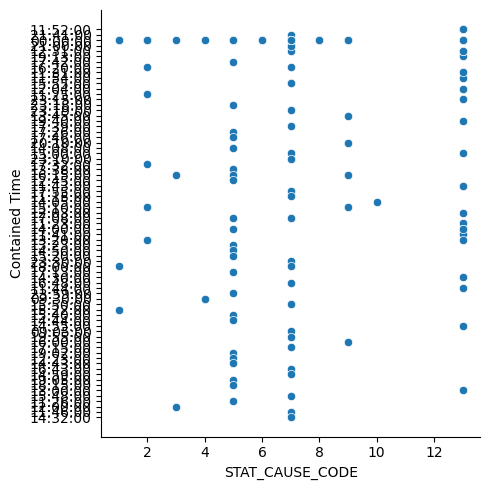

In [42]:
sns.relplot(x="STAT_CAUSE_CODE", y="Contained Time",
data=df1.sample(frac=0.001))

In [ ]:
sns.regplot(x="STAT_CAUSE_CODE",
y="Contained Time", data=df1.sample(frac=0.01))

In [ ]:
sns.pairplot(df1.sample(frac=0.0001))